In [17]:
import pandas as pd
from glob import glob
from os.path import join
import numpy as np
import os
import re

In [1]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import re
import nltk
import string
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

In [42]:
osaka = pd.read_csv('/content/total_Osaka.csv')

In [109]:
tokenized_keyword = osaka['keyword']

In [110]:
tokenized_keyword = tokenized_keyword.fillna(value="['A']")

In [112]:
import ast

for i in range(len(tokenized_keyword)):
  x = tokenized_keyword[i]
  x = ast.literal_eval(x)
  tokenized_keyword[i] = x

In [114]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(tokenized_keyword)
print(len(dictionary))

dictionary.filter_extremes(keep_n = 2000, no_below = 5, no_above = 0.5)
print(len(dictionary))

corpus = [dictionary.doc2bow(text) for text in tokenized_keyword]
print(len(corpus))

81
44
79


In [115]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=10, id2word=dictionary)
lsi_model.print_topics(num_words=10)

[(0,
  '-0.365*"산책" + -0.320*"쇼핑" + -0.313*"옛날" + -0.279*"음식점" + -0.271*"카페" + -0.264*"공원" + -0.248*"기념품" + -0.221*"휴식" + -0.173*"역사" + -0.159*"옷"'),
 (1,
  '0.370*"쇼핑" + -0.360*"공원" + -0.348*"역사" + -0.306*"박물관" + 0.252*"백화점" + 0.238*"음식점" + 0.227*"쇼핑몰" + 0.207*"옷" + -0.198*"체험" + -0.194*"산책"'),
 (2,
  '-0.454*"기념품" + 0.403*"휴식" + 0.265*"광장" + -0.241*"전망대" + -0.222*"배" + -0.219*"체험" + 0.219*"꽃" + 0.191*"산책" + -0.172*"시장" + -0.171*"역사"'),
 (3,
  '-0.469*"옛날" + 0.324*"체험" + 0.277*"실내" + 0.273*"카페" + -0.251*"산책" + 0.241*"야경" + 0.198*"관람차" + -0.189*"골목" + -0.183*"신사" + 0.181*"옷"'),
 (4,
  '0.402*"야경" + 0.352*"배" + 0.335*"전망대" + -0.248*"체험" + -0.236*"박물관" + 0.223*"산책" + -0.219*"선물" + -0.189*"카페" + -0.175*"백화점" + 0.173*"관람차"'),
 (5,
  '-0.444*"옷" + -0.337*"온천" + -0.306*"목욕탕" + -0.273*"스파" + -0.271*"실내" + 0.233*"쇼핑" + 0.204*"어린이" + 0.191*"관람차" + -0.179*"음식점" + 0.173*"광장"'),
 (6,
  '0.365*"게임" + 0.305*"음식점" + 0.293*"어린이" + -0.292*"카페" + -0.254*"백화점" + 0.214*"놀이기구" + 0.193*"스파" + 0.190*"관람차" + 

In [117]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 5, 15
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
  coherence = CoherenceModel(model=model,
                             texts=tokenized_keyword,
                             dictionary=dictionary,
                             coherence='u_mass')
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[-8.732258041448228, -8.422220905852196, -7.7974825661019045, -8.47333212157308, -7.788569961821512, -8.008215598890153, -7.151464054267712, -7.764532687496046, -7.999870406401689, -7.84786113849684]


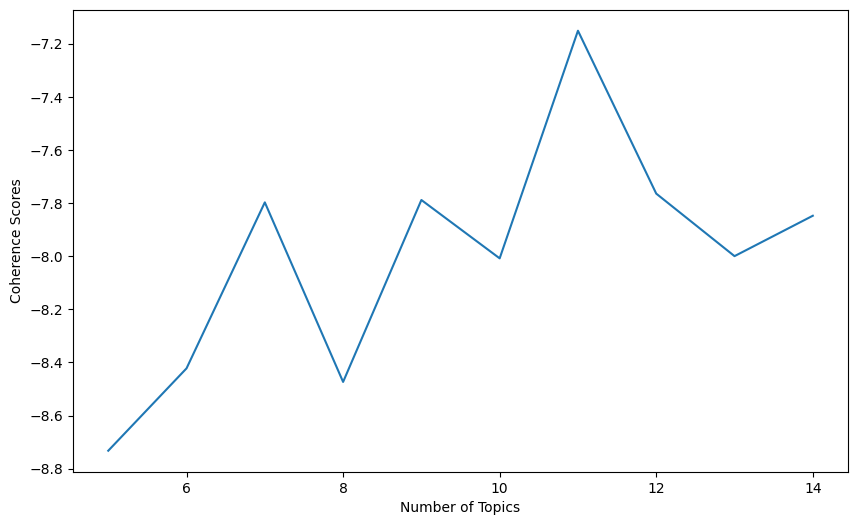

In [118]:
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [120]:
lsi_model = LsiModel(corpus, num_topics=11, id2word=dictionary)
lsi_model.print_topics(num_words=10)

[(0,
  '-0.365*"산책" + -0.320*"쇼핑" + -0.313*"옛날" + -0.279*"음식점" + -0.271*"카페" + -0.264*"공원" + -0.248*"기념품" + -0.221*"휴식" + -0.173*"역사" + -0.159*"옷"'),
 (1,
  '0.370*"쇼핑" + -0.360*"공원" + -0.348*"역사" + -0.306*"박물관" + 0.252*"백화점" + 0.238*"음식점" + 0.227*"쇼핑몰" + 0.207*"옷" + -0.198*"체험" + -0.194*"산책"'),
 (2,
  '-0.454*"기념품" + 0.403*"휴식" + 0.265*"광장" + -0.241*"전망대" + -0.222*"배" + -0.219*"체험" + 0.219*"꽃" + 0.191*"산책" + -0.172*"시장" + -0.171*"역사"'),
 (3,
  '0.469*"옛날" + -0.324*"체험" + -0.277*"실내" + -0.273*"카페" + 0.251*"산책" + -0.241*"야경" + -0.198*"관람차" + 0.189*"골목" + 0.183*"신사" + -0.181*"옷"'),
 (4,
  '-0.402*"야경" + -0.352*"배" + -0.335*"전망대" + 0.248*"체험" + 0.236*"박물관" + -0.223*"산책" + 0.219*"선물" + 0.189*"카페" + 0.175*"백화점" + -0.173*"관람차"'),
 (5,
  '0.444*"옷" + 0.337*"온천" + 0.306*"목욕탕" + 0.273*"스파" + 0.271*"실내" + -0.233*"쇼핑" + -0.204*"어린이" + -0.191*"관람차" + 0.179*"음식점" + -0.173*"광장"'),
 (6,
  '-0.365*"게임" + -0.305*"음식점" + -0.293*"어린이" + 0.292*"카페" + 0.254*"백화점" + -0.214*"놀이기구" + -0.193*"스파" + -0.190*"관람차

In [128]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary)
lda_model.print_topics(num_words=10)

[(0,
  '0.097*"체험" + 0.097*"박물관" + 0.073*"역사" + 0.073*"온천" + 0.050*"옛날" + 0.050*"기념품" + 0.050*"전통" + 0.050*"옷" + 0.050*"실내" + 0.050*"스파"'),
 (1,
  '0.095*"쇼핑" + 0.084*"음식점" + 0.077*"옛날" + 0.071*"배" + 0.071*"기념품" + 0.055*"산책" + 0.040*"야경" + 0.039*"골목" + 0.036*"먹거리" + 0.035*"공연"'),
 (2,
  '0.023*"옛날" + 0.023*"산책" + 0.023*"카페" + 0.023*"기념품" + 0.023*"음식점" + 0.023*"쇼핑" + 0.023*"휴식" + 0.023*"역사" + 0.023*"박물관" + 0.023*"공원"'),
 (3,
  '0.078*"카페" + 0.073*"체험" + 0.073*"기념품" + 0.059*"옷" + 0.059*"쇼핑" + 0.053*"옛날" + 0.052*"산책" + 0.040*"쇼핑몰" + 0.040*"음식점" + 0.040*"먹거리"'),
 (4,
  '0.107*"기념품" + 0.075*"옷" + 0.075*"카페" + 0.074*"야경" + 0.073*"전망대" + 0.068*"옛날" + 0.043*"관람차" + 0.041*"실내" + 0.035*"쇼핑" + 0.035*"음식점"'),
 (5,
  '0.078*"옛날" + 0.076*"쇼핑" + 0.059*"휴식" + 0.057*"관람차" + 0.040*"꽃" + 0.040*"인형" + 0.040*"배" + 0.040*"음식점" + 0.039*"공원" + 0.039*"카페"'),
 (6,
  '0.074*"공원" + 0.071*"실내" + 0.056*"게임" + 0.056*"휴식" + 0.056*"어린이" + 0.056*"스파" + 0.051*"옷" + 0.038*"쇼핑" + 0.038*"박물관" + 0.038*"음식점"'),
 (7,
  '0.081

In [129]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 5, 15
perplexity_values = []
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
  perplexity_values.append(model.log_perplexity(corpus))
  coherence = CoherenceModel(model=model,
                             texts=tokenized_keyword,
                             dictionary=dictionary,
                             coherence='u_mass')
  coherence_scores.append(coherence.get_coherence())

print(perplexity_values)
print(coherence_scores)

[-4.165230699619393, -4.2017740863892765, -4.301988887198178, -4.374011077998597, -4.495650746940095, -4.509744589527448, -4.646352258085469, -4.645016268907506, -4.691062307008255, -4.687206508568775]
[-3.644432682235844, -4.344589880469968, -3.8342236182991516, -3.54834071901936, -3.6314533169249006, -3.944191595604461, -3.8978300216493293, -3.655153533107112, -3.68996062653895, -3.6714904735178946]


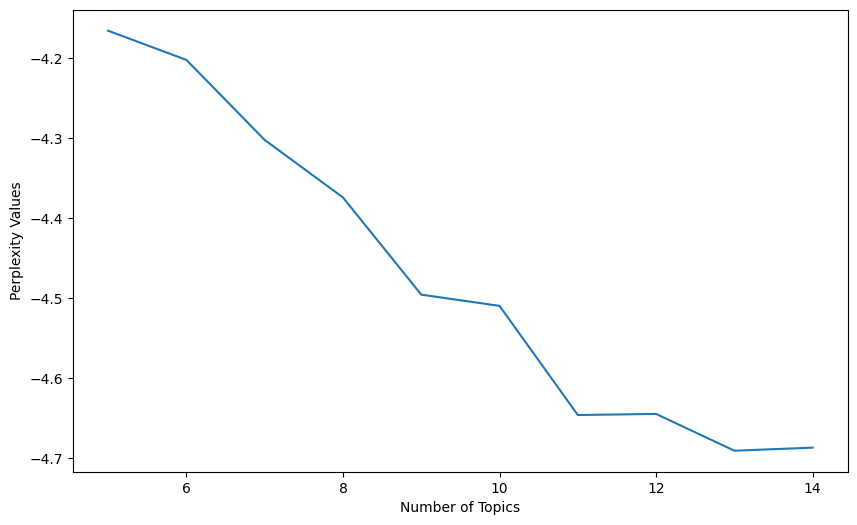

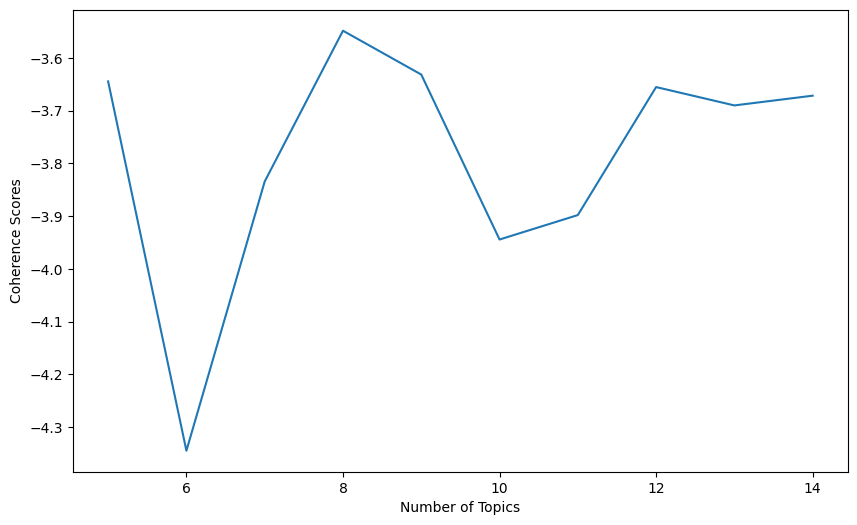

In [130]:
import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, perplexity_values)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Values')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [151]:
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary)
topics = lda_model.print_topics(num_words=10)
print(topics)

cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print('Coherence : ', coherence)
print('Perplexity : ', lda_model.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.082*"쇼핑" + 0.077*"기념품" + 0.065*"옛날" + 0.050*"산책" + 0.047*"음식점" + 0.047*"백화점" + 0.041*"배" + 0.041*"야경" + 0.038*"카페" + 0.037*"전망대"'), (1, '0.109*"역사" + 0.086*"옛날" + 0.060*"산책" + 0.057*"체험" + 0.057*"박물관" + 0.057*"신사" + 0.035*"공연" + 0.034*"어린이" + 0.034*"음식점" + 0.034*"쇼핑"'), (2, '0.102*"카페" + 0.060*"기념품" + 0.060*"체험" + 0.059*"어린이" + 0.047*"콘서트" + 0.046*"공원" + 0.046*"산책" + 0.044*"옛날" + 0.032*"쇼핑" + 0.032*"박물관"'), (3, '0.069*"휴식" + 0.069*"옷" + 0.058*"산책" + 0.052*"쇼핑" + 0.052*"음식점" + 0.041*"공원" + 0.041*"쇼핑몰" + 0.035*"카페" + 0.035*"온천" + 0.035*"야경"'), (4, '0.098*"음식점" + 0.075*"옛날" + 0.070*"카페" + 0.070*"쇼핑" + 0.057*"게임" + 0.047*"체험" + 0.047*"공원" + 0.035*"그림" + 0.034*"역사" + 0.033*"산책"'), (5, '0.079*"산책" + 0.074*"공원" + 0.054*"카페" + 0.051*"기념품" + 0.050*"옛날" + 0.046*"박물관" + 0.045*"역사" + 0.039*"체험" + 0.035*"휴식" + 0.034*"실내"')]
Coherence :  -4.113018320324433
Perplexity :  -4.248401525119941


In [135]:
!pip install -Uqq pyLDAvis==2.1.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
